In [1]:
import sys
root = '/home/featurize/data'
sys.path.append(f'{root}/pikachu/utils')
sys.path.append(f'{root}/pikachu/third')
sys.path.append(f'{root}/pikachu')
sys.path.append(f'{root}/pikachu/projects/ai/naic_seg')

In [2]:
import gezi
from gezi.metrics.image.semantic_seg import Evaluator
import melt as mt
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image, ImageEnhance 
import tensorflow_addons as tfa

In [3]:
model = mt.load_model('../input/submit_1123_2/model.h5')

In [4]:
# model = mt.load_model('../working/auglevel4/model.h5')

In [5]:
# model2 = mt.load_model('../input/model.h5')

In [6]:
# !cp /home/featurize/work/naicseg/v9/sm.Unet.EfficientNetB4.augl3.size256.200epoch.mix.swa10/model.h5 /home/featurize/data/

In [7]:
# model2 = mt.load_model('/home/featurize/work/naicseg/v9/abc/sm.Unet.EfficientNetB4.augl3.size256.200epoch.mix.swa50/model_tta.h5')

In [8]:
model.summary()

Model: "Ensemble_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
sm.Unet_EfficientnetB5_0 (Funct (None, 256, 256, 15) 41476094    image[0][0]                      
__________________________________________________________________________________________________
sm.FPN_EfficientnetB4_1 (Functi (None, 256, 256, 15) 20959734    image[0][0]                      
__________________________________________________________________________________________________
sm.Unet_EfficientnetB2_2 (Funct (None, 256, 256, 15) 17146240    image[0][0]                      
_________________________________________________________________________________________

In [9]:
# model2.summary()

In [10]:
# model.predict(np.asarray([img]))

In [11]:
CLASSES = ['water', 'track', 'build', 'arable', 'grass', 'forest', 'bare', 'other']
CLASSES_V2 = ['water', 'track_road', 'build', 'track_airport', 'other_park', 'other_playground', 
            'arable_natural', 'arable_greenhouse',
            'grass_natural', 'grass_greenbelt', 
            'forest_natural', 'forest_planted', 
            'bare_natural', 'bare_planted', 'other_other']

In [12]:
def vis(image, x):
  gezi.plot.segmentation(image.astype(np.uint8), x.argmax(-1), CLASSES_V2)

In [13]:
def vis_pred_dv1(x, index, root_dir='../input/eval.naic.v1'):
  label = (cv2.imread(f'{root_dir}/label/{index}.png', cv2.IMREAD_UNCHANGED) / 100 - 1).astype(np.uint8)
  gezi.plot.segmentation_eval_logits(
            cv2.imread(f'{root_dir}/image/{index}.tif'),
            label,
            x,
            CLASSES_V2,
        )

In [14]:
def vis_pred_dv2(x, index, root_dir='../input/eval.naic'):
  label = (cv2.imread(f'{root_dir}/label/{index}.png', cv2.IMREAD_UNCHANGED)).astype(np.uint8)
  m = {}
  for i in range(17):
    if i < 4:
      m[i + 1] = i
    else:
      m[i + 1] = i - 2
  f = np.vectorize(lambda x: m[x])
  label = f(label).astype(np.uint8)
  print(Evaluator(CLASSES_V2).eval_all(label[np.newaxis,:,:], x.argmax(-1)[np.newaxis,:,:]))
  gezi.plot.segmentation_eval_logits(
            cv2.imread(f'{root_dir}/image/{index}.tif'),
            label,
            x,
            CLASSES_V2,
        )

In [8]:
img = gezi.imread('../input/eval.naic.v1/image/187676.tif')

In [9]:
img = tfa.image.sharpness(img, 0.1).numpy()

In [10]:
mt.image.sharpness('../input/eval.naic.v1/image/187676.tif')

7.092036805460891

In [11]:
mt.image.sharpness('../input/eval.naic/image/88307.tif')

8.380725788269284

In [12]:
res = model.predict(np.asarray([img]))[0]

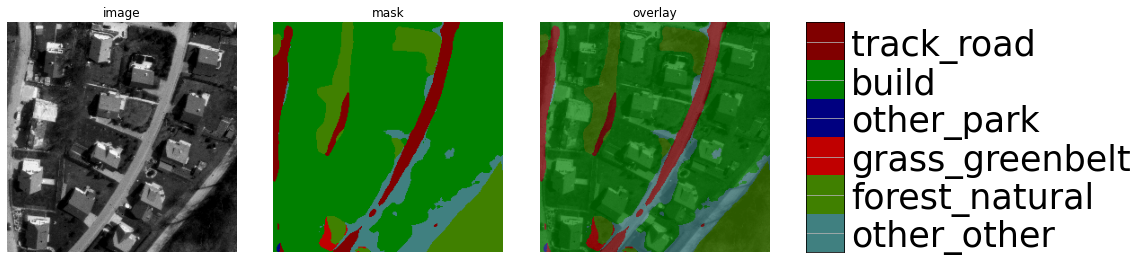

(256, 256, 3)

In [33]:
img = gezi.imread('/home/featurize/data/ISPR/dataset/resid/images/5888_1b.ras')
img = tf.image.resize(img, (256, 256)).numpy()
res = model.predict(np.asarray([img]))[0]
vis(img, res)
img.shape

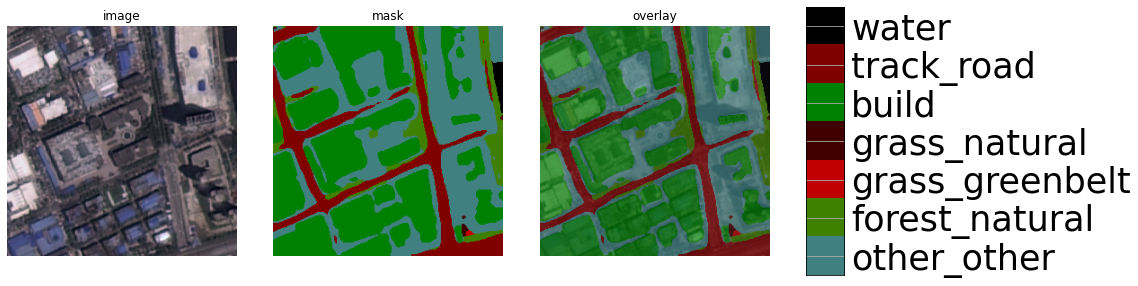

(256, 256, 3)

In [29]:
img = gezi.imread('/home/featurize/data/WHDLD/Images/wh0500.jpg')
res = model.predict(np.asarray([img]))[0]
vis(img, res)
img.shape

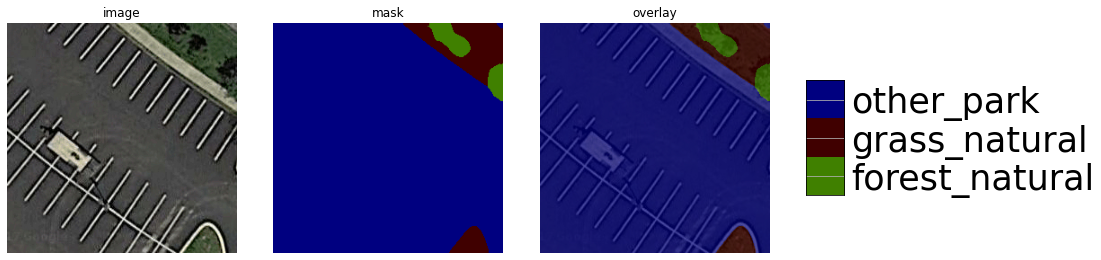

(256, 256, 3)

In [25]:
img = gezi.imread('/home/featurize/data/PatternNet/images/parking_space/parkingspace001.jpg')
res = model.predict(np.asarray([img]))[0]
vis(img, res)
img.shape

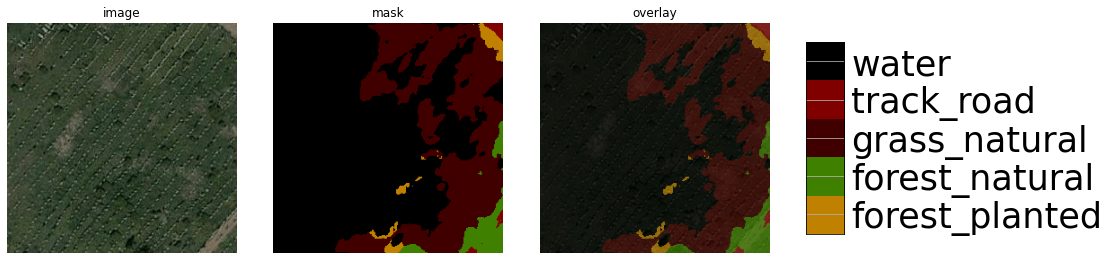

(256, 256, 3)

In [26]:
img = gezi.imread('/home/featurize/data/PatternNet/images/cemetery/cemetery001.jpg')
res = model.predict(np.asarray([img]))[0]
vis(img, res)
img.shape

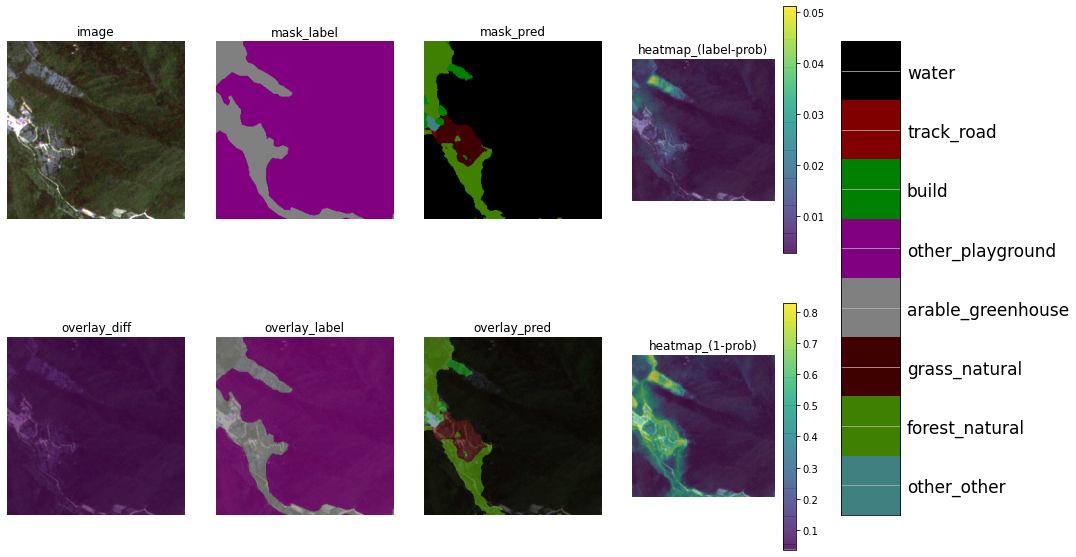

In [17]:
vis_pred_dv1(res, 187676)

In [13]:
res[100][100]

array([6.6827226, 1.009385 , 1.0564271, 1.0538486, 1.0700818, 1.1062284,
       1.0428345, 1.0887347, 1.5672531, 1.0268697, 2.6998844, 1.0995343,
       1.0567522, 0.9685599, 1.1973016], dtype=float32)

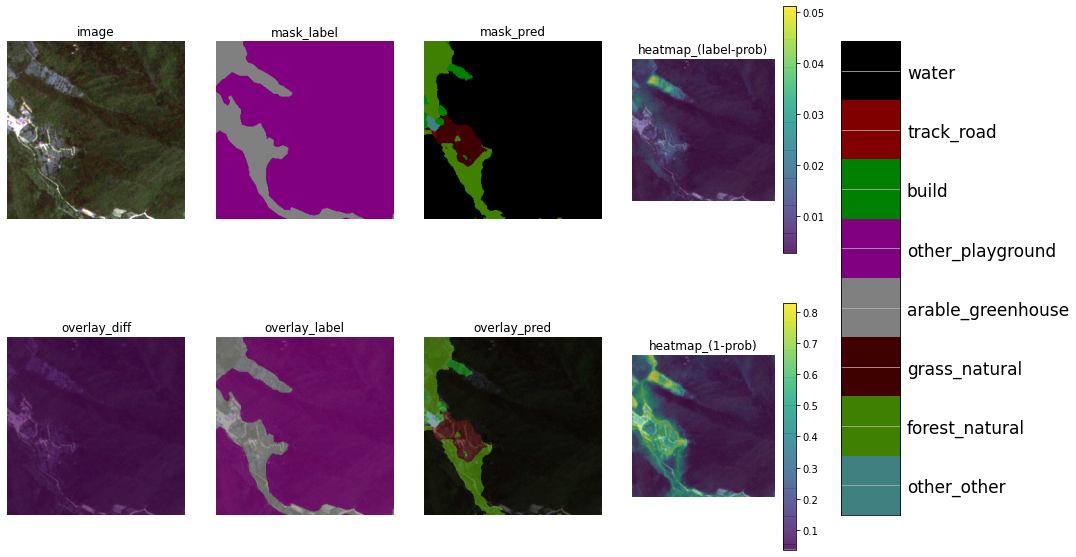

In [16]:
index = 187676
img = gezi.imread(f'../input/eval.naic.v1/image/{index}.tif')
img = tfa.image.sharpness(img, 0.01).numpy()
res = model.predict(np.asarray([img]))[0]
vis_pred_dv1(res, index)

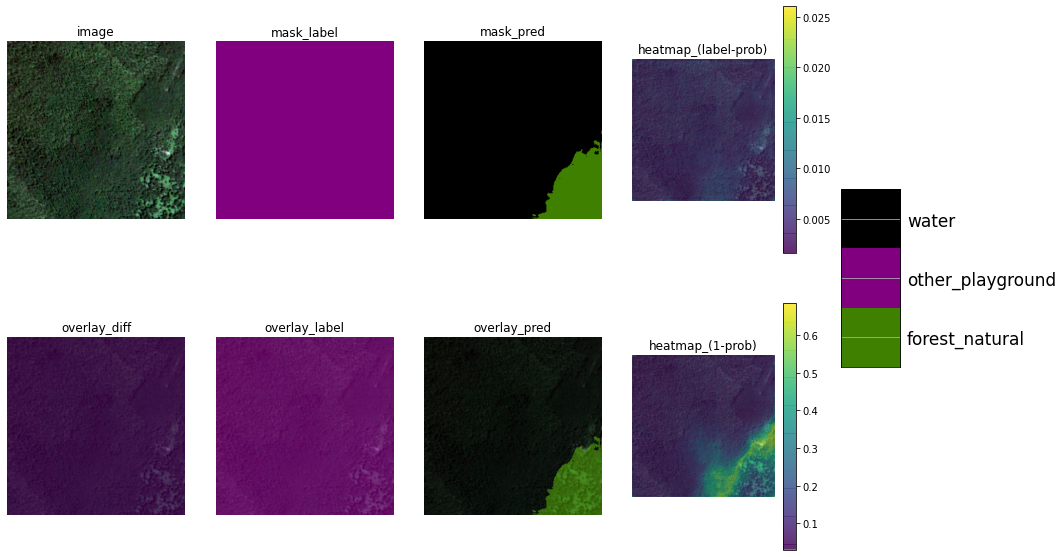

In [13]:
index = 121116
img = gezi.imread(f'../input/eval.naic.v1/image/{index}.tif')
# img = tfa.image.sharpness(img, 0.01).numpy()
res = model.predict(np.asarray([img]))[0]
vis_pred_dv1(res, index)

In [22]:
res[100][100]

array([ 4.3021126 , -0.69585794, -5.220832  , -0.8156987 , -0.779385  ,
       -0.6743711 , -0.46916556, -0.70719004, -0.09175496, -0.29293257,
        1.3308357 , -0.5709097 , -0.46246415, -0.5579146 , -0.69603294],
      dtype=float32)

In [23]:
res[0][0]

array([ 0.7475599 , -1.7621644 , -3.8239353 , -2.2921834 , -1.4919796 ,
       -2.1387308 , -1.5829682 , -2.3339968 , -0.42700833, -1.3575419 ,
        0.5127958 , -1.83129   , -1.1052054 , -1.5995916 , -1.1978521 ],
      dtype=float32)

In [24]:
res[250][250]

array([ 1.3199874 , -1.4997418 , -3.3205814 , -1.7420784 , -1.4123031 ,
       -2.2946064 , -1.2825302 , -1.7556645 , -0.24430293, -1.4306943 ,
        3.4518838 , -1.1141403 , -1.4971693 , -1.6920018 , -1.5312006 ],
      dtype=float32)

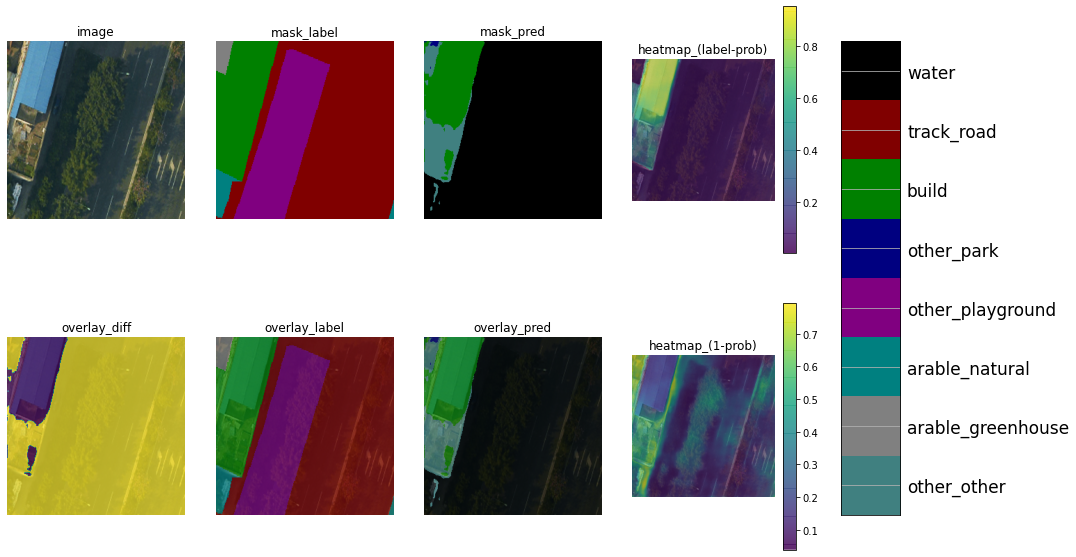

In [40]:
index = 265144
img = gezi.imread(f'../input/eval.naic.v1/image/{index}.tif')
# img = np.array(ImageEnhance.Sharpness(Image.fromarray(img.astype(np.uint8))).enhance(0.2))
res2 = model.predict(np.asarray([img]))[0]
vis_pred_dv1(res2, index)

In [26]:
res2[0][0]

array([-2.6662884 , -2.5904086 , -0.6721684 , -3.1633744 , -0.33102262,
       -2.6478028 , -1.9741831 , -3.3747463 , -1.6858218 , -2.4301422 ,
       -1.1531613 , -2.114752  , -2.5383902 , -2.3177714 , -1.701906  ],
      dtype=float32)

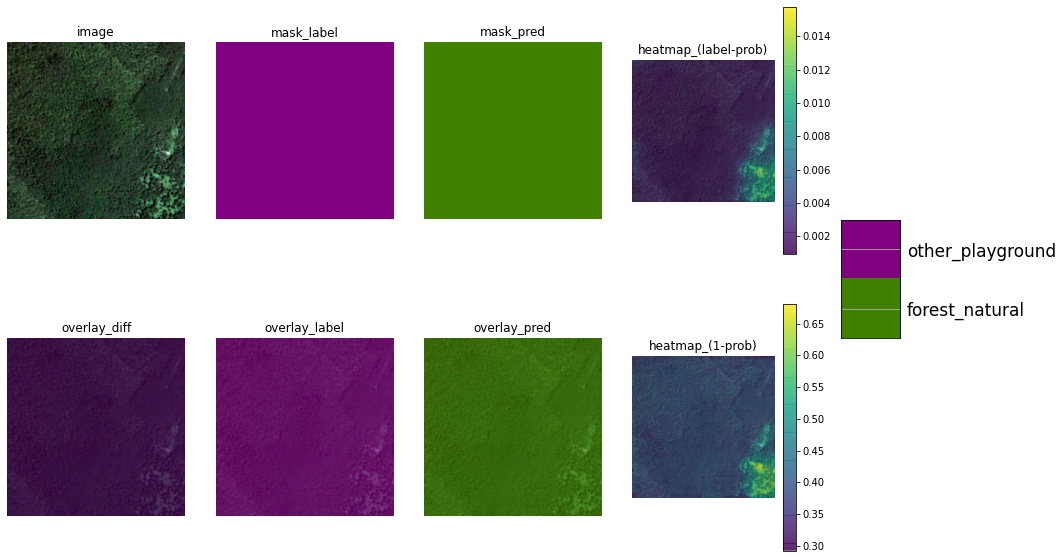

In [32]:
index = 121116
img = gezi.imread(f'../input/eval.naic.v1/image/{index}.tif')
res2 = model2.predict(np.asarray([img]))[0]
vis_pred_dv1(res2, index)

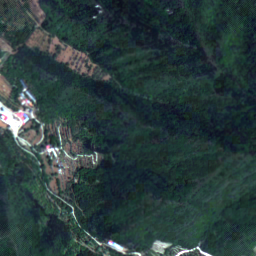

In [6]:
Image.fromarray(img.astype(np.uint8))

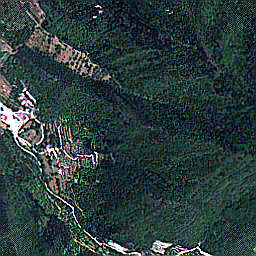

In [12]:
enhancer = ImageEnhance.Sharpness(Image.fromarray(img.astype(np.uint8)))
enhanced_im = enhancer.enhance(10)
enhanced_im

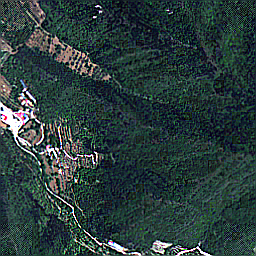

In [13]:
Image.fromarray(tfa.image.sharpness(img, 10).numpy().astype(np.uint8))


({'FWIoU': 0.6459945223872174, 'MIoU': 0.5359025305180021, 'ACC/pixel': 0.7818756103515625, 'ACC/class': 0.6545761978079404, 'IoU/water': nan, 'IoU/track_road': 0.6731896473983227, 'IoU/build': 0.8676700843476943, 'IoU/track_airport': nan, 'IoU/other_park': nan, 'IoU/other_playground': nan, 'IoU/arable_natural': 0.5905591572123177, 'IoU/arable_greenhouse': nan, 'IoU/grass_natural': 0.29191246431969553, 'IoU/grass_greenbelt': 0.5230274901820778, 'IoU/forest_natural': 0.6430729391454467, 'IoU/forest_planted': 0.002403846153846154, 'IoU/bare_natural': nan, 'IoU/bare_planted': nan, 'IoU/other_other': 0.6953846153846154}, {'FWIoU': [0.6459945223872174], 'MIoU': [0.5359025305180021], 'ACC/pixel': [0.7818756103515625], 'ACC/class': [0.6545761978079404], 'IoU/water': [nan], 'IoU/track_road': [0.6731896473983227], 'IoU/build': [0.8676700843476943], 'IoU/track_airport': [nan], 'IoU/other_park': [nan], 'IoU/other_playground': [nan], 'IoU/arable_natural': [0.5905591572123177], 'IoU/arable_greenho

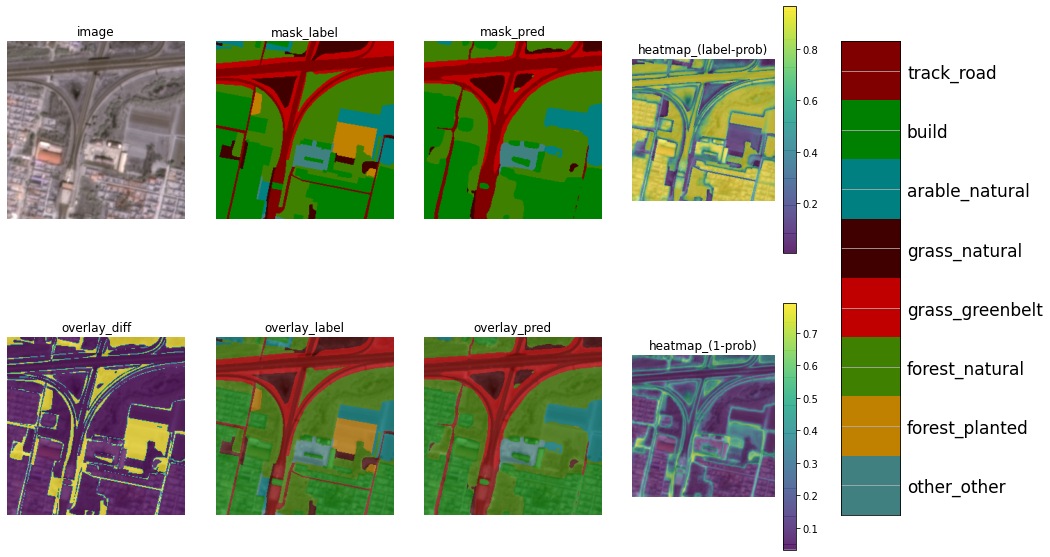

In [17]:
index = 19253
index = 88307
img = gezi.imread(f'../input/eval.naic/image/{index}.tif')
res = model.predict(np.asarray([img]))[0]
vis_pred_dv2(res, index)


({'FWIoU': 0.7029541250093452, 'MIoU': 0.4080698779005284, 'ACC/pixel': 0.8183135986328125, 'ACC/class': 0.5392248100283672, 'IoU/water': 0.6407144805017726, 'IoU/track_road': 0.07670454545454546, 'IoU/build': nan, 'IoU/track_airport': nan, 'IoU/other_park': nan, 'IoU/other_playground': nan, 'IoU/arable_natural': 0.8560908084163898, 'IoU/arable_greenhouse': nan, 'IoU/grass_natural': 0.49093668324761824, 'IoU/grass_greenbelt': nan, 'IoU/forest_natural': 0.6723335719398712, 'IoU/forest_planted': 0.43142476697736354, 'IoU/bare_natural': 0.09635416666666667, 'IoU/bare_planted': nan, 'IoU/other_other': 0.0}, {'FWIoU': [0.7029541250093452], 'MIoU': [0.4080698779005284], 'ACC/pixel': [0.8183135986328125], 'ACC/class': [0.5392248100283672], 'IoU/water': [0.6407144805017726], 'IoU/track_road': [0.07670454545454546], 'IoU/build': [nan], 'IoU/track_airport': [nan], 'IoU/other_park': [nan], 'IoU/other_playground': [nan], 'IoU/arable_natural': [0.8560908084163898], 'IoU/arable_greenhouse': [nan], 

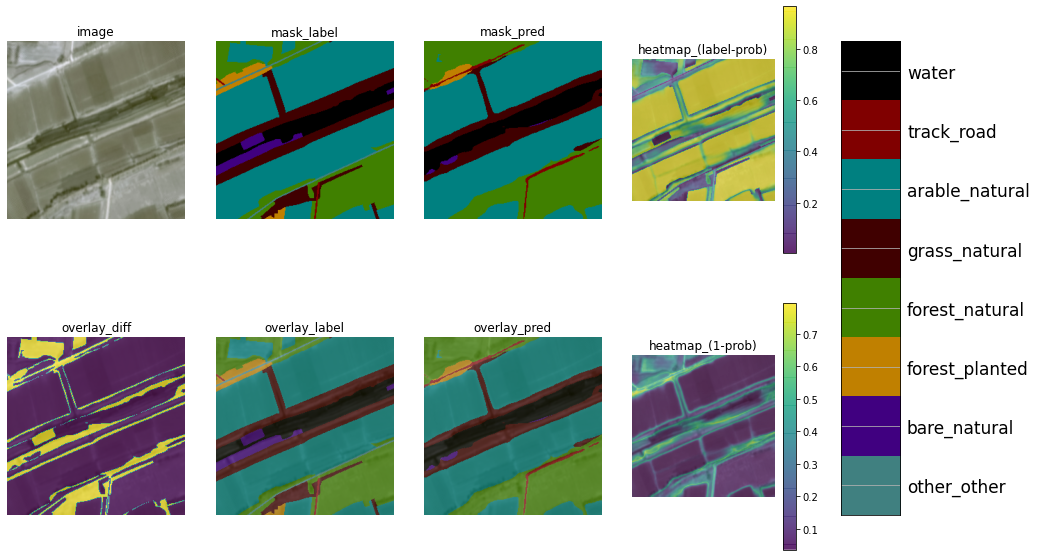

In [151]:
index = 88307
index = 55198
img = gezi.imread(f'../input/eval.naic/image/{index}.tif')
img = np.array(ImageEnhance.Sharpness(Image.fromarray(img.astype(np.uint8))).enhance(0.1))
res = model.predict(np.asarray([img]))[0]
vis_pred_dv2(res, index)


({'FWIoU': 0.7029510608917898, 'MIoU': 0.5230610587773552, 'ACC/pixel': 0.8040618896484375, 'ACC/class': 0.6924916873295562, 'IoU/water': 0.9415628904203441, 'IoU/track_road': 0.5737361023704636, 'IoU/build': 0.6162733124277934, 'IoU/track_airport': nan, 'IoU/other_park': nan, 'IoU/other_playground': nan, 'IoU/arable_natural': 0.0, 'IoU/arable_greenhouse': nan, 'IoU/grass_natural': 0.45719129697654703, 'IoU/grass_greenbelt': nan, 'IoU/forest_natural': 0.7246569278441788, 'IoU/forest_planted': nan, 'IoU/bare_natural': 0.7115231259968102, 'IoU/bare_planted': 0.29489795918367345, 'IoU/other_other': 0.38770791377638547}, {'FWIoU': [0.7029510608917898], 'MIoU': [0.5230610587773552], 'ACC/pixel': [0.8040618896484375], 'ACC/class': [0.6924916873295562], 'IoU/water': [0.9415628904203441], 'IoU/track_road': [0.5737361023704636], 'IoU/build': [0.6162733124277934], 'IoU/track_airport': [nan], 'IoU/other_park': [nan], 'IoU/other_playground': [nan], 'IoU/arable_natural': [0.0], 'IoU/arable_greenho

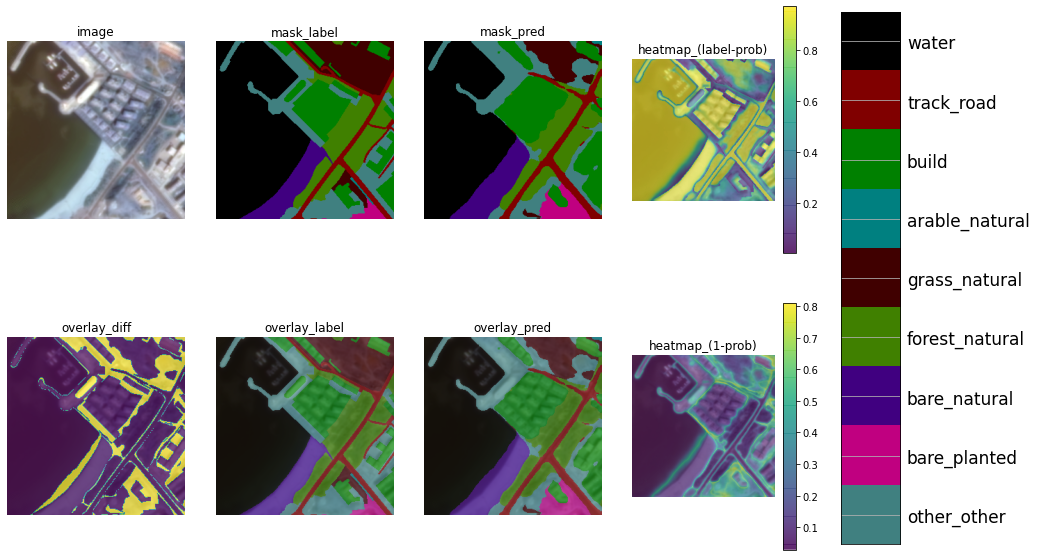

In [152]:
# index = 88307
index = 80040
img = gezi.imread(f'../input/eval.naic/image/{index}.tif')
img = np.array(ImageEnhance.Sharpness(Image.fromarray(img.astype(np.uint8))).enhance(2))
res = model.predict(np.asarray([img]))[0]
vis_pred_dv2(res, index)


({'FWIoU': 0.7905543747578847, 'MIoU': 0.468085467656504, 'ACC/pixel': 0.8797149658203125, 'ACC/class': 0.6383301341636208, 'IoU/water': 0.9069554014224952, 'IoU/track_road': 0.4789915966386555, 'IoU/build': 0.5380645161290323, 'IoU/track_airport': nan, 'IoU/other_park': nan, 'IoU/other_playground': nan, 'IoU/arable_natural': nan, 'IoU/arable_greenhouse': nan, 'IoU/grass_natural': nan, 'IoU/grass_greenbelt': nan, 'IoU/forest_natural': 0.402317880794702, 'IoU/forest_planted': nan, 'IoU/bare_natural': 0.3747947005365159, 'IoU/bare_planted': nan, 'IoU/other_other': 0.10738871041762277}, {'FWIoU': [0.7905543747578847], 'MIoU': [0.468085467656504], 'ACC/pixel': [0.8797149658203125], 'ACC/class': [0.6383301341636208], 'IoU/water': [0.9069554014224952], 'IoU/track_road': [0.4789915966386555], 'IoU/build': [0.5380645161290323], 'IoU/track_airport': [nan], 'IoU/other_park': [nan], 'IoU/other_playground': [nan], 'IoU/arable_natural': [nan], 'IoU/arable_greenhouse': [nan], 'IoU/grass_natural': [

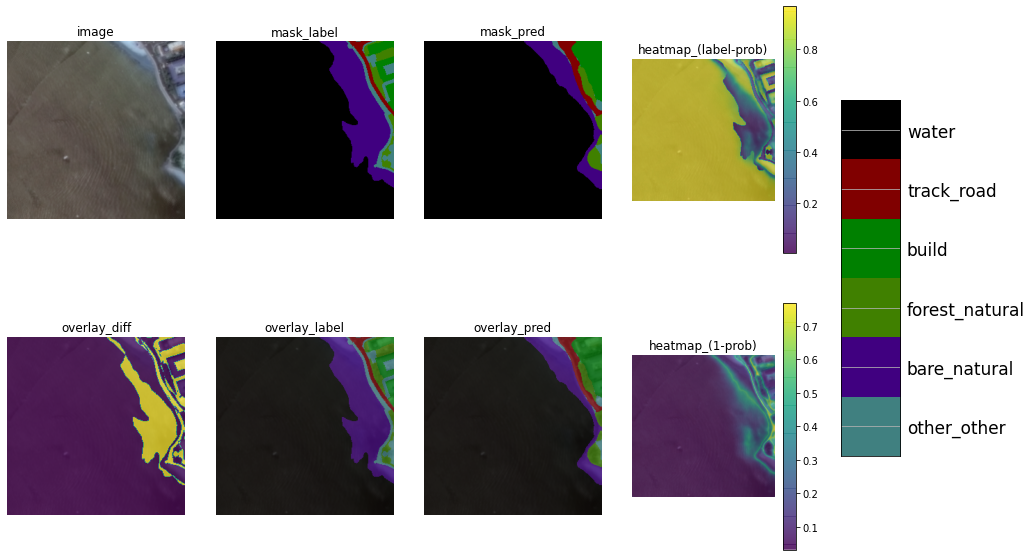

In [172]:
index = 27468
index = 52402
index = 29948
index = 14904 
index = 52423
img = gezi.imread(f'../input/eval.naic/image/{index}.tif')
img = np.array(ImageEnhance.Sharpness(Image.fromarray(img.astype(np.uint8))).enhance(1.5))
res = model.predict(np.asarray([img]))[0]
vis_pred_dv2(res, index)

In [70]:
tf.random.normal((), 1.05)

<tf.Tensor: shape=(), dtype=float32, numpy=0.71818185>

In [61]:
tf.random.uniform((), 0.1, 2)

<tf.Tensor: shape=(), dtype=float32, numpy=1.2162688>